In [1]:
from IPython.display import Image

## Project 3 - Retail

### DESCRIPTION

#### Problem Statement

* Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques. 
* You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 

#### Dataset Snapshot

Training Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided. 

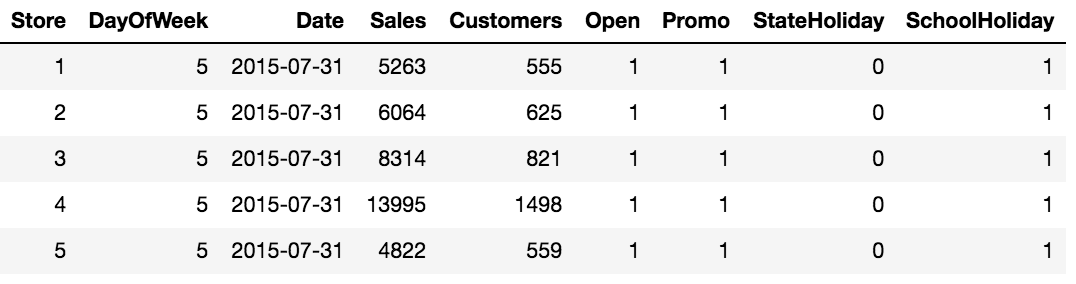

In [2]:
Image('1566547170_cap 3.png')

#### Project Task: Week 1

#### Exploratory Data Analysis (EDA) and Linear Regression:

1.      Transform the variables by using data manipulation techniques like, One-Hot Encoding 
2.      Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.
3.      Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error)
         and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric?
         a)      Train a single model for all stores, using storeId as a feature.
         b)      Train separate model for each store.
         c)      Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]
         d)      Try Ensemble of b) and c). What are the findings?
         e)      Use Regularized Regression. It should perform better in an unseen test set. Any insights??
         f)      Open-ended modeling to get possible predictions.

#### Code:

In [3]:
#importing the necessary packages
import pandas as pd
import pandas_profiling

In [4]:
df = pd.read_csv('train_data.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation: Sales is highly and positively correlated with Customers, Open and Promo. Low positive correlation with schoolholiday and low negative correlation with stateholiday.

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
#Label encode DayOfWeek and StateHoliday

encode = LabelEncoder()

df['StateHoliday'] = df['StateHoliday'] .replace([0], '0')

df['DayOfWeek'] = encode.fit_transform(df['DayOfWeek'])
#df['StateHoliday'] = encode.fit_transform(df['StateHoliday'])

print(df['DayOfWeek'].unique(),df['DayOfWeek'].dtype)

df['StateHoliday'].unique()

[1 0 6 5 4 3 2] int64


array(['0', 'a', 'b', 'c'], dtype=object)

In [7]:
Temp = pd.get_dummies(df['StateHoliday'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {'0':'State0'}, inplace = True)
df.rename(columns = {'a':'Statea'}, inplace = True)
df.rename(columns = {'b':'Stateb'}, inplace = True)
df.rename(columns = {'c':'Statec'}, inplace = True)

df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          1  2015-06-30   5735        568     1      1   
1           2          1  2015-06-30   9863        877     1      1   
2           3          1  2015-06-30  13261       1072     1      1   
3           4          1  2015-06-30  13106       1488     1      1   
4           5          1  2015-06-30   6635        645     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
982639   1111          1  2013-01-01      0          0     0      0   
982640   1112          1  2013-01-01      0          0     0      0   
982641   1113          1  2013-01-01      0          0     0      0   
982642   1114          1  2013-01-01      0          0     0      0   
982643   1115          1  2013-01-01      0          0     0      0   

       StateHoliday  SchoolHoliday  State0  Statea  Stateb  Statec  
0                 0              0       1       0       0       0  
1                 0              0       1       0       0       0  
2                 0              1       1       0       0       0  
3                 0              0       1       0       0       0  
4                 0              0       1       0       0       0  
...             ...            ...     ...     ...     ...     ...  
982639            a              1       0       1       0       0  
982640            a              1       0       1       0       0  
982641            a              1       0       1       0       0  
982642            a              1       0       1       0       0  
982643            a              1       0       1       0       0  

[982644 rows x 13 columns]

In [8]:
Temp = pd.get_dummies(df['DayOfWeek'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {0:'sun'}, inplace = True)
df.rename(columns = {1:'mon'}, inplace = True)
df.rename(columns = {2:'tue'}, inplace = True)
df.rename(columns = {3:'wed'}, inplace = True)
df.rename(columns = {4:'thu'}, inplace = True)
df.rename(columns = {5:'fri'}, inplace = True)
df.rename(columns = {6:'sat'}, inplace = True)
df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          1  2015-06-30   5735        568     1      1   
1           2          1  2015-06-30   9863        877     1      1   
2           3          1  2015-06-30  13261       1072     1      1   
3           4          1  2015-06-30  13106       1488     1      1   
4           5          1  2015-06-30   6635        645     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
982639   1111          1  2013-01-01      0          0     0      0   
982640   1112          1  2013-01-01      0          0     0      0   
982641   1113          1  2013-01-01      0          0     0      0   
982642   1114          1  2013-01-01      0          0     0      0   
982643   1115          1  2013-01-01      0          0     0      0   

       StateHoliday  SchoolHoliday  State0  Statea  Stateb  Statec  sun  mon  \
0                 0              0       1       0       0       0    0    1   
1                 0              0       1       0       0       0    0    1   
2                 0              1       1       0       0       0    0    1   
3                 0              0       1       0       0       0    0    1   
4                 0              0       1       0       0       0    0    1   
...             ...            ...     ...     ...     ...     ...  ...  ...   
982639            a              1       0       1       0       0    0    1   
982640            a              1       0       1       0       0    0    1   
982641            a              1       0       1       0       0    0    1   
982642            a              1       0       1       0       0    0    1   
982643            a              1       0       1       0       0    0    1   

        tue  wed  thu  fri  sat  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
982639    0    0    0    0    0  
982640    0    0    0    0    0  
982641    0    0    0    0    0  
982642    0    0    0    0    0  
982643    0    0    0    0    0  

[982644 rows x 20 columns]

In [9]:
df=df.drop(['StateHoliday','DayOfWeek'], axis=1)

In [10]:
df

Store        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0           1  2015-06-30   5735        568     1      1              0   
1           2  2015-06-30   9863        877     1      1              0   
2           3  2015-06-30  13261       1072     1      1              1   
3           4  2015-06-30  13106       1488     1      1              0   
4           5  2015-06-30   6635        645     1      1              0   
...       ...         ...    ...        ...   ...    ...            ...   
982639   1111  2013-01-01      0          0     0      0              1   
982640   1112  2013-01-01      0          0     0      0              1   
982641   1113  2013-01-01      0          0     0      0              1   
982642   1114  2013-01-01      0          0     0      0              1   
982643   1115  2013-01-01      0          0     0      0              1   

        State0  Statea  Stateb  Statec  sun  mon  tue  wed  thu  fri  sat  
0            1       0       0       0    0    1    0    0    0    0    0  
1            1       0       0       0    0    1    0    0    0    0    0  
2            1       0       0       0    0    1    0    0    0    0    0  
3            1       0       0       0    0    1    0    0    0    0    0  
4            1       0       0       0    0    1    0    0    0    0    0  
...        ...     ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  
982639       0       1       0       0    0    1    0    0    0    0    0  
982640       0       1       0       0    0    1    0    0    0    0    0  
982641       0       1       0       0    0    1    0    0    0    0    0  
982642       0       1       0       0    0    1    0    0    0    0    0  
982643       0       1       0       0    0    1    0    0    0    0    0  

[982644 rows x 18 columns]

In [11]:
X = df.drop(['Sales', 'Date'], axis=1)

Y = df['Sales']

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                                test_size=0.3,
                                                                random_state = 1)    

from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
import pickle # allows for saving models to hard drive

lg = LinearRegression()
lg.fit(xtrain,ytrain)

print(lg.intercept_, lg.coef_)

-147.7320016191452 [-1.48107711e-01  6.06913322e+00  5.38152226e+02  1.40563080e+03
  1.41218202e+02  1.19801391e+03 -3.77708825e+02 -9.84419686e+02
  1.64114603e+02  6.91390824e+02  1.15409897e+02 -7.65766607e+01
 -1.28757631e+02  3.09433445e+01  3.61172012e+02 -9.93581786e+02]


In [12]:
import math

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [89]:
y_true = [1,2,3,4]
y_pred = [1,2,5,4]
mean_absolute_percentage_error(y_true,y_pred)

16.666666666666664

In [14]:
lrpredictions = lg.predict(xtest)
#print(sqrt(mean_squared_error(ytrain, lg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lg.predict(xtest))))
r2score = r2_score(ytest, lrpredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, lrpredictions)))
#mape = mean_absolute_percentage_error(ytest.to_numpy(), predictions)
#print('MAPE: {}'.format(mape))
mse = mean_squared_error(ytest, lrpredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1459.1140867628988
R2 Value/Coeff of Det: 0.8568175798803241
Mean Absolute Error: 969.0242461761428
MSE: 2129013.918189928
Root Mean Square Error: 1459.1140867628988


Observeration: Lasso seems to perform better based on r2 value

###### Train model for single store:

In [20]:
df_store1 = df[df['Store']==1]

In [21]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
df_store1

Store        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0           1  2015-06-30   5735        568     1      1              0   
1115        1  2015-06-29   5197        541     1      1              0   
2230        1  2015-06-28      0          0     0      0              0   
3345        1  2015-06-27   4019        463     1      0              0   
4460        1  2015-06-26   3317        420     1      0              0   
...       ...         ...    ...        ...   ...    ...            ...   
977070      1  2013-01-05   4997        635     1      0              1   
978185      1  2013-01-04   4486        619     1      0              1   
979300      1  2013-01-03   4327        578     1      0              1   
980415      1  2013-01-02   5530        668     1      0              1   
981530      1  2013-01-01      0          0     0      0              1   

        State0  Statea  Stateb  Statec  sun  mon  tue  wed  thu  fri  sat  
0            1       0       0       0    0    1    0    0    0    0    0  
1115         1       0       0       0    1    0    0    0    0    0    0  
2230         1       0       0       0    0    0    0    0    0    0    1  
3345         1       0       0       0    0    0    0    0    0    1    0  
4460         1       0       0       0    0    0    0    0    1    0    0  
...        ...     ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  
977070       1       0       0       0    0    0    0    0    0    1    0  
978185       1       0       0       0    0    0    0    0    1    0    0  
979300       1       0       0       0    0    0    0    1    0    0    0  
980415       1       0       0       0    0    0    1    0    0    0    0  
981530       0       1       0       0    0    1    0    0    0    0    0  

[911 rows x 18 columns]

In [46]:
X = df_store1.drop(['Sales', 'Date'], axis=1)

Y = df_store1['Sales']

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                                test_size=0.3,
                                                                random_state = 1) 

In [47]:
lg = LinearRegression()
lg.fit(xtrain,ytrain)

predictions = lg.predict(xtest)

print(sqrt(mean_squared_error(ytrain, lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lassoreg.predict(xtest))))
r2score = r2_score(ytest, predictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, predictions)))
mse = mean_squared_error(ytest, predictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

436.84263657414965
427.87643410468036
R2 Value/Coeff of Det: 0.9837255672922802
Mean Absolute Error: 194.181535711022
MSE: 65264.34955507029
Root Mean Square Error: 255.4688817744155


Observation: R2 value is increased and errors have reduced compared to model trained on all stores

In [48]:
df_store2 = df[df['Store']==2]

In [49]:
X = df_store2.drop(['Sales', 'Date'], axis=1)

Y = df_store2['Sales']

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                                test_size=0.3,
                                                                random_state = 1) 

In [50]:
lg = LinearRegression()
lg.fit(xtrain,ytrain)

predictions = lg.predict(xtest)

print(sqrt(mean_squared_error(ytrain, lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lassoreg.predict(xtest))))
r2score = r2_score(ytest, predictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, predictions)))
mse = mean_squared_error(ytest, predictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

509.2627122681433
428.87226446740095
R2 Value/Coeff of Det: 0.9679191647202582
Mean Absolute Error: 273.4443163092541
MSE: 183928.73502209192
Root Mean Square Error: 428.86913507746385


Observation: R2 value is increased and errors have reduced compared to model trained on all stores

###### Create ensemble models:

In [52]:
#Carry out test train split again on all stores data since it is overwritten by store wise data
X = df.drop(['Sales', 'Date'], axis=1)

Y = df['Sales']

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                                test_size=0.3,
                                                                random_state = 1)    

###### Bagging Ensemble:

In [53]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [54]:
regr = regr.fit(xtrain, ytrain)

In [55]:
predictions = regr.predict(xtest)

In [57]:
print(sqrt(mean_squared_error(ytest, predictions)))
r2score = r2_score(ytest, predictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, predictions)))
mse = mean_squared_error(ytest, predictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))
print(regr.score(xtrain, ytrain, sample_weight=None))

1648.4331526456024
R2 Value/Coeff of Det: 0.817251475681456
Mean Absolute Error: 1092.031398439346
MSE: 2717331.8587411195
Root Mean Square Error: 1648.4331526456024
0.8180451577876308


In [41]:
regr.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Observation: R2 has decreased from 0.8568175798803241 to 0.817251475681456 after using bagging ensemble

###### Boosting Ensemble:

In [58]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(xtrain, ytrain)
AdaBoostRegressor(n_estimators=100, random_state=0)
predictions = regr.predict(xtest)
regr.score(xtrain, ytrain)

0.6694546055604942

In [59]:
r2score = r2_score(ytest, predictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, predictions)))
mse = mean_squared_error(ytest, predictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))
print(regr.score(xtrain, ytrain, sample_weight=None))

R2 Value/Coeff of Det: 0.6654808307400246
Mean Absolute Error: 1707.385240522252
MSE: 4974046.16195582
Root Mean Square Error: 2230.256972179623
0.6694546055604942


Observation: R2 has decreased from 0.8568175798803241 to 0.6654808307400246 after using boosting ensemble 

###### Using regularized regression:

In [56]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(xtrain, ytrain)

lassopredictions = lassoreg.predict(xtest)

print(sqrt(mean_squared_error(ytrain, lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lassoreg.predict(xtest))))
r2score = r2_score(ytest, lassopredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, lassopredictions)))
mse = mean_squared_error(ytest, lassopredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1448.828431291681
1459.1111525038712
R2 Value/Coeff of Det: 0.8568181557556311
Mean Absolute Error: 968.7860319889857
MSE: 2129005.3553611753
Root Mean Square Error: 1459.1111525038712


In [59]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001, normalize=True)
ridgereg.fit(xtrain, ytrain)

ridgepredictions = ridgereg.predict(xtest)

print(sqrt(mean_squared_error(ytrain, ridgereg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, ridgereg.predict(xtest))))
r2score = r2_score(ytest, ridgepredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, ridgepredictions)))
mse = mean_squared_error(ytest, ridgepredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1448.8296414650938
1459.0918687660978
R2 Value/Coeff of Det: 0.8568219403376189
Mean Absolute Error: 969.2092896258417
MSE: 2128949.0814993437
Root Mean Square Error: 1459.0918687660978


In [60]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(xtrain, ytrain)

enetpredictions = Elas.predict(xtest)

print(sqrt(mean_squared_error(ytrain, Elas.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, Elas.predict(xtest))))
r2score = r2_score(ytest, enetpredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, enetpredictions)))
mse = mean_squared_error(ytest, enetpredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

3835.614121317119
3833.459924716954
R2 Value/Coeff of Det: 0.011690310906168122
Mean Absolute Error: 2879.7130144177777
MSE: 14695414.994410915
Root Mean Square Error: 3833.459924716954


Observation: No significant improvement seen over linear regression (R2 = 0.8568175) in both Lasso (R2 = 0.8568) and Ridge (R2 = 0.8568)

###### Comparing the predictions on unknown dataset:

In [64]:
#read test dataset:
dftest = pd.read_csv('test_data.csv')

In [67]:
dftest.head()

Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015        555     1      1            0   
1      2          5  31-07-2015        625     1      1            0   
2      3          5  31-07-2015        821     1      1            0   
3      4          5  31-07-2015       1498     1      1            0   
4      5          5  31-07-2015        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [65]:
#prep for test dataset:


In [68]:
#Label encode DayOfWeek and StateHoliday

encode = LabelEncoder()

dftest['StateHoliday'] = dftest['StateHoliday'] .replace([0], '0')

dftest['DayOfWeek'] = encode.fit_transform(dftest['DayOfWeek'])
#df['StateHoliday'] = encode.fit_transform(df['StateHoliday'])

print(dftest['DayOfWeek'].unique(),dftest['DayOfWeek'].dtype)

dftest['StateHoliday'].unique()

[4 3 2 1 0 6 5] int64


array(['0'], dtype=object)

In [69]:
Temp = pd.get_dummies(dftest['StateHoliday'])
Temp.head()

dftest = pd.concat([dftest, Temp], axis=1)
dftest.rename(columns = {'0':'State0'}, inplace = True)
dftest.rename(columns = {'a':'Statea'}, inplace = True)
dftest.rename(columns = {'b':'Stateb'}, inplace = True)
dftest.rename(columns = {'c':'Statec'}, inplace = True)

dftest

Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0          1          4  31-07-2015        555     1      1            0   
1          2          4  31-07-2015        625     1      1            0   
2          3          4  31-07-2015        821     1      1            0   
3          4          4  31-07-2015       1498     1      1            0   
4          5          4  31-07-2015        559     1      1            0   
...      ...        ...         ...        ...   ...    ...          ...   
34560   1111          2  01-07-2015        351     1      1            0   
34561   1112          2  01-07-2015        716     1      1            0   
34562   1113          2  01-07-2015        770     1      1            0   
34563   1114          2  01-07-2015       3788     1      1            0   
34564   1115          2  01-07-2015        447     1      1            0   

       SchoolHoliday  State0  
0                  1       1  
1                  1       1  
2                  1       1  
3                  1       1  
4                  1       1  
...              ...     ...  
34560              1       1  
34561              1       1  
34562              0       1  
34563              0       1  
34564              0       1  

[34565 rows x 9 columns]

In [72]:
Temp = pd.get_dummies(dftest['DayOfWeek'])
Temp.head()

dftest = pd.concat([dftest, Temp], axis=1)
dftest.rename(columns = {0:'sun'}, inplace = True)
dftest.rename(columns = {1:'mon'}, inplace = True)
dftest.rename(columns = {2:'tue'}, inplace = True)
dftest.rename(columns = {3:'wed'}, inplace = True)
dftest.rename(columns = {4:'thu'}, inplace = True)
dftest.rename(columns = {5:'fri'}, inplace = True)
dftest.rename(columns = {6:'sat'}, inplace = True)
dftest

Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0          1          4  31-07-2015        555     1      1            0   
1          2          4  31-07-2015        625     1      1            0   
2          3          4  31-07-2015        821     1      1            0   
3          4          4  31-07-2015       1498     1      1            0   
4          5          4  31-07-2015        559     1      1            0   
...      ...        ...         ...        ...   ...    ...          ...   
34560   1111          2  01-07-2015        351     1      1            0   
34561   1112          2  01-07-2015        716     1      1            0   
34562   1113          2  01-07-2015        770     1      1            0   
34563   1114          2  01-07-2015       3788     1      1            0   
34564   1115          2  01-07-2015        447     1      1            0   

       SchoolHoliday  State0  sun  mon  tue  wed  thu  fri  sat  
0                  1       1    0    0    0    0    1    0    0  
1                  1       1    0    0    0    0    1    0    0  
2                  1       1    0    0    0    0    1    0    0  
3                  1       1    0    0    0    0    1    0    0  
4                  1       1    0    0    0    0    1    0    0  
...              ...     ...  ...  ...  ...  ...  ...  ...  ...  
34560              1       1    0    0    1    0    0    0    0  
34561              1       1    0    0    1    0    0    0    0  
34562              0       1    0    0    1    0    0    0    0  
34563              0       1    0    0    1    0    0    0    0  
34564              0       1    0    0    1    0    0    0    0  

[34565 rows x 16 columns]

In [ ]:
X = dftest.drop(['Sales', 'Date'], axis=1)

Y = dftest['Sales']

In [74]:
lrpredictions = lg.predict(X)
#print(sqrt(mean_squared_error(ytrain, lg.predict(xtrain))))
print(sqrt(mean_squared_error(Y, lg.predict(X))))
r2score = r2_score(Y, lrpredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(Y, lrpredictions)))
#mape = mean_absolute_percentage_error(ytest.to_numpy(), predictions)
#print('MAPE: {}'.format(mape))
mse = mean_squared_error(Y, lrpredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1451.9194029489806
R2 Value/Coeff of Det: 0.858336798080548
Mean Absolute Error: 967.489020471493
MSE: 2108069.9526597243
Root Mean Square Error: 1451.9194029489806


In [76]:
ridgepredictions = ridgereg.predict(X)

print(sqrt(mean_squared_error(Y, ridgereg.predict(X))))
r2score = r2_score(Y, ridgepredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(Y, ridgepredictions)))
mse = mean_squared_error(Y, ridgepredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1451.9159341147752
R2 Value/Coeff of Det: 0.8583374749853023
Mean Absolute Error: 967.6776817166991
MSE: 2108059.87973638
Root Mean Square Error: 1451.9159341147752


In [77]:
lassopredictions = lassoreg.predict(X)

print(sqrt(mean_squared_error(Y, lassoreg.predict(X))))
r2score = r2_score(Y, lassopredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(Y, lassopredictions)))
mse = mean_squared_error(Y, lassopredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1451.9209025547736
R2 Value/Coeff of Det: 0.8583365054485086
Mean Absolute Error: 967.248224861522
MSE: 2108074.3072754685
Root Mean Square Error: 1451.9209025547736


Observation: Ridge gives the best R2 value (0.858337) on testdata.csv (data not seen by the model yet). This is because it avoids overfitting

##### Project Task: Week 2

##### Other Regression Techniques:

1. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?
2. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.
       a)    Train a single model for all stores, where storeId can be a feature.
       b)    Train separate models for each store.
       Note: Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models. 
3. Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?
4. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.
       a)    Identify yearly trends and seasonal months

In [ ]:
# Get metrics when predicted with entire dataset including closed days of stores

In [15]:
lg = LinearRegression()
lg.fit(xtrain,ytrain)
lrpredictions = lg.predict(xtest)
#print(sqrt(mean_squared_error(ytrain, lg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lg.predict(xtest))))
r2score = r2_score(ytest, lrpredictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, lrpredictions)))
#mape = mean_absolute_percentage_error(ytest.to_numpy(), predictions)
#print('MAPE: {}'.format(mape))
mse = mean_squared_error(ytest, lrpredictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1459.1140867628985
R2 Value/Coeff of Det: 0.8568175798803241
Mean Absolute Error: 969.0242461761428
MSE: 2129013.9181899275
Root Mean Square Error: 1459.1140867628985


In [14]:
# Now let us remove stores data that were closed from both train and test

In [16]:
df_opendays = df[df['Open']==1]

In [21]:
df_opendays.head()

Store        Date  Sales  Customers  Open  Promo  SchoolHoliday  State0  \
0      1  2015-06-30   5735        568     1      1              0       1   
1      2  2015-06-30   9863        877     1      1              0       1   
2      3  2015-06-30  13261       1072     1      1              1       1   
3      4  2015-06-30  13106       1488     1      1              0       1   
4      5  2015-06-30   6635        645     1      1              0       1   

   Statea  Stateb  Statec  sun  mon  tue  wed  thu  fri  sat  
0       0       0       0    0    1    0    0    0    0    0  
1       0       0       0    0    1    0    0    0    0    0  
2       0       0       0    0    1    0    0    0    0    0  
3       0       0       0    0    1    0    0    0    0    0  
4       0       0       0    0    1    0    0    0    0    0

In [22]:
X_opendays = df_opendays.drop(['Sales', 'Date'], axis=1)

Y_opendays = df_opendays['Sales']

from sklearn import model_selection
xtrain_od, xtest_od, ytrain_od, ytest_od = model_selection.train_test_split(X_opendays,Y_opendays,
                                                                test_size=0.3,
                                                                random_state = 1)  

In [23]:
# Predict using linear regression

In [45]:
lg_od = LinearRegression()
lg_od.fit(xtrain_od,ytrain_od)
lrpredictions_od = lg_od.predict(xtest_od)
#print(sqrt(mean_squared_error(ytrain, lg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest_od, lrpredictions_od)))
r2score = r2_score(ytest_od, lrpredictions_od)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest_od, lrpredictions_od)))
mse = mean_squared_error(ytest_od, lrpredictions_od)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

1596.5190456204257
R2 Value/Coeff of Det: 0.7387416494866506
Mean Absolute Error: 1141.6146368798925
MSE: 2548873.063028755
Root Mean Square Error: 1596.5190456204257


Observation: there is no improvement in R2 and errors are increased after removing days where store was closed

###### Random Forest - Single model for all stores, with cross validation and hyper parameter selection

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
exception calling callback for <Future at 0x7ff5a4157d90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
rf_random.best_params_

In [ ]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [47]:
regr = regr.fit(X, Y)

In [93]:
predictions = regr.predict(xtest)

In [94]:
print(sqrt(mean_squared_error(ytest, predictions)))
r2score = r2_score(ytest, predictions)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, predictions)))
mse = mean_squared_error(ytest, predictions)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))
print(regr.score(X, Y, sample_weight=None))

1650.4509993458196
R2 Value/Coeff of Det: 0.8168037969814957
Mean Absolute Error: 1093.531594974754
MSE: 2723988.5012416146
Root Mean Square Error: 1650.4509993458196
0.8172232755827437


Project Task: Week 3

Implementing Neural Networks:

* Train a LSTM on the same set of features and compare the result with traditional time-series model.
* Comment on the behavior of all the models you have built so far
* Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.
* Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

In [1]:
import pandas as pd
df = pd.read_csv('train_data.csv')

/Users/raji/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [3]:
#Label encode DayOfWeek and StateHoliday

encode = LabelEncoder()

df['StateHoliday'] = df['StateHoliday'] .replace([0], '0')

df['DayOfWeek'] = encode.fit_transform(df['DayOfWeek'])


In [4]:
Temp = pd.get_dummies(df['StateHoliday'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {'0':'State0'}, inplace = True)
df.rename(columns = {'a':'Statea'}, inplace = True)
df.rename(columns = {'b':'Stateb'}, inplace = True)
df.rename(columns = {'c':'Statec'}, inplace = True)


In [5]:
Temp = pd.get_dummies(df['DayOfWeek'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {0:'sun'}, inplace = True)
df.rename(columns = {1:'mon'}, inplace = True)
df.rename(columns = {2:'tue'}, inplace = True)
df.rename(columns = {3:'wed'}, inplace = True)
df.rename(columns = {4:'thu'}, inplace = True)
df.rename(columns = {5:'fri'}, inplace = True)
df.rename(columns = {6:'sat'}, inplace = True)


In [6]:
df=df.drop(['StateHoliday','DayOfWeek'], axis=1)

In [7]:
df

Store        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0           1  2015-06-30   5735        568     1      1              0   
1           2  2015-06-30   9863        877     1      1              0   
2           3  2015-06-30  13261       1072     1      1              1   
3           4  2015-06-30  13106       1488     1      1              0   
4           5  2015-06-30   6635        645     1      1              0   
...       ...         ...    ...        ...   ...    ...            ...   
982639   1111  2013-01-01      0          0     0      0              1   
982640   1112  2013-01-01      0          0     0      0              1   
982641   1113  2013-01-01      0          0     0      0              1   
982642   1114  2013-01-01      0          0     0      0              1   
982643   1115  2013-01-01      0          0     0      0              1   

        State0  Statea  Stateb  Statec  sun  mon  tue  wed  thu  fri  sat  
0            1       0       0       0    0    1    0    0    0    0    0  
1            1       0       0       0    0    1    0    0    0    0    0  
2            1       0       0       0    0    1    0    0    0    0    0  
3            1       0       0       0    0    1    0    0    0    0    0  
4            1       0       0       0    0    1    0    0    0    0    0  
...        ...     ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  
982639       0       1       0       0    0    1    0    0    0    0    0  
982640       0       1       0       0    0    1    0    0    0    0    0  
982641       0       1       0       0    0    1    0    0    0    0    0  
982642       0       1       0       0    0    1    0    0    0    0    0  
982643       0       1       0       0    0    1    0    0    0    0    0  

[982644 rows x 18 columns]

In [11]:
#X = df.drop(['Sales', 'Date'], axis=1)

#Y = df['Sales']

#from sklearn import model_selection
#xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
#                                                                test_size=0.3,
#                                                                random_state = 1)    

In [17]:
#Find optimal kvalue for running kmeans
df.iloc[:,3]

0          568
1          877
2         1072
3         1488
4          645
          ... 
982639       0
982640       0
982641       0
982642       0
982643       0
Name: Customers, Length: 982644, dtype: int64

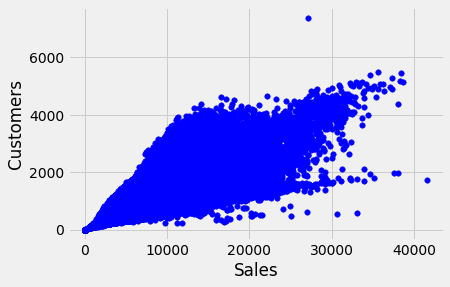

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
  
style.use("fivethirtyeight")

#2 in df is Sales and 3 in df is Customers
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], s = 30, color ='b')
  
# label the axes
plt.xlabel('Sales')
plt.ylabel('Customers')
  
plt.show()
plt.clf() # clear the figure

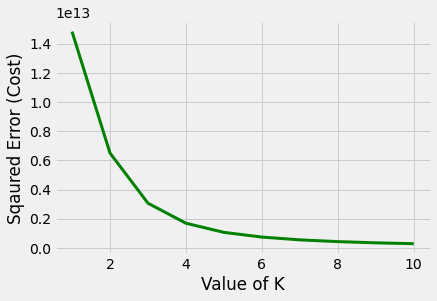

In [20]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df[['Sales','Customers']])
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot
  
# the point of the elbow is the 
# most optimal value for choosing k

In [21]:
#Observation: Based on above graph 6 or 8 clusters can be created

In [22]:
#Now split data into clusters and in each cluster split data into train and test

In [23]:
from sklearn.cluster import KMeans
# Cluster using SOME columns
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans = kmeans.fit(df[['Sales','Customers']])
# Save the labels
df.loc[:,'labels'] = kmeans.labels_

In [27]:
df['labels'].value_counts()

6    220585
1    194476
0    172033
3    146841
7    134891
4     75257
2     29841
5      8720
Name: labels, dtype: int64

In [34]:
X = df.drop(['Sales', 'Date'], axis=1)

Y = df[['Sales', 'labels']]

from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                               test_size=0.3,
                                                               random_state = 1)   

In [47]:
import csv
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

train_cluster = xtrain.groupby(['labels'])
test_cluster = xtest.groupby(['labels'])
train_label = ytrain.groupby(['labels'])
test_label = ytest.groupby(['labels'])
r2_avg=0
with open('cluster_wise_predictions.csv', 'w', newline='') as csvfile:
        metricwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for i in range(0,8):
            a = train_cluster.get_group(i)
            b = test_cluster.get_group(i)
            c = train_label.get_group(i)
            d = test_label.get_group(i)

            model = Lasso(alpha=0.0005)
            model.fit(a,c)
            predictions = model.predict(b)
            r2score = r2_score(d, predictions)
            r2_avg=r2_avg+r2score
            mse = mean_squared_error(d, predictions)
            rmse = math.sqrt(mse)
            metricwriter.writerow(['Store :', i, 'R2 Value/Coeff of Det:',  format(r2score), \
                                       'Mean Absolute Error:', format(mean_absolute_error(d, predictions)), \
                                       'MSE: ', format(mse), 'Root Mean Square Error: ', format(rmse)])

print('Average R2:')
print(r2_avg/(i+1) )  
print('i:')
print(i)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3437440320.289959, tolerance: 3358134.8243891615
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2129151889.0519981, tolerance: 3548614.0959075554
  positive)
/usr/

Average R2:
0.6223887008460333
i:
7


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


In [44]:
#Observation: Certain clusters had good R2 values and some had low values

*Cluster	R2 Value/Coeff of Det:	Mean Absolute Error:	MSE: 	Root Mean Square Error:

*0	0.988865017	2.035035729	502.2389592	22.4106885

*1	0.536374208	204.6200605	115162.1122	339.3554363

*2	0.545701627	507.5239339	756814.5271	869.9508762

*3	0.674526354	206.4369671	130559.9386	361.3307883

*4	0.531635434	334.3648209	314174.4376	560.5126561

*5	0.616587465	923.6087963	3131865.076	1769.707624

*6	0.552438686	189.4146301	100236.3415	316.6012342

*7	0.532980815	243.6738117	164896.2278	406.0741653

In [45]:
#Observation: Cluster 0 had best R2 score followed by 3 and 4. Rest had low scores

In [8]:
###### Train time series model with time as the only feature

from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

/Users/raji/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = df[['Store', 'Date', 'Sales']]

data_store1 = data[data['Store']==1]

data_store1 = data_store1.drop(['Store'], axis=1)

data_store1['Date'] = data_store1['Date'].apply(lambda x: dt(int(x[:4]), int(x[5:7]), 15))

data_store1=data_store1.groupby('Date').sum().reset_index()

data_store1 = data_store1.set_index('Date')

ts = data_store1['Sales']

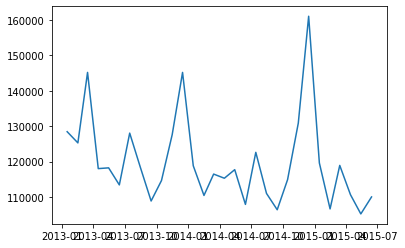

In [10]:
#Monthly trend across years
plt.plot(ts)

In [ ]:
#Seasonality: Trend is upwards between months 10 and 12 and downwards between 1 and 3

In [12]:
import numpy as np
#transformation
ts_log = np.log(ts)

In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3,center=False).mean() 
    rolstd = timeseries.rolling(window=3,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

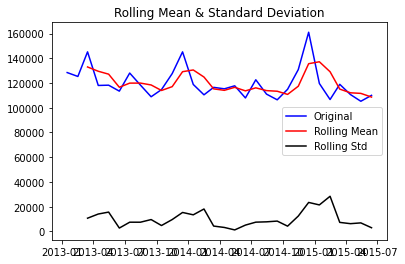

Results of Dickey-Fuller Test:
Test Statistic                 -2.170693
p-value                         0.217053
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [14]:
test_stationarity(data_store1['Sales'])

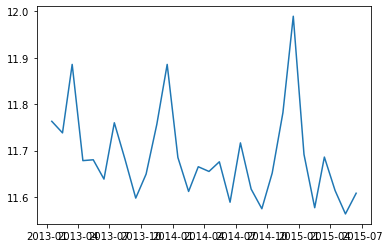

In [15]:
plt.plot(ts_log)

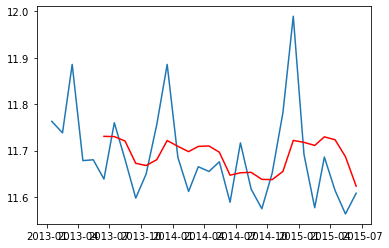

In [16]:
movingAverage = ts_log.rolling(window=6).mean()
movingSTD = ts_log.rolling(window=6).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [17]:
# Get the difference between the moving average and the actual sales
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)
#Remove Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Date
2013-06-15   -0.092005
2013-07-15    0.029776
2013-08-15   -0.039597
2013-09-15   -0.074901
2013-10-15   -0.018397
2013-11-15    0.075954
2013-12-15    0.163831
2014-01-15   -0.024048
2014-02-15   -0.085694
2014-03-15   -0.043751
Name: Sales, dtype: float64

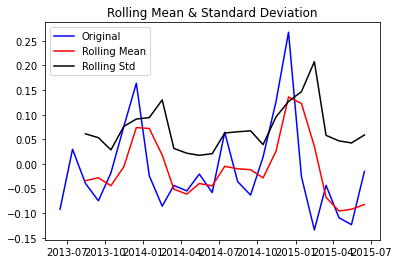

Results of Dickey-Fuller Test:
Test Statistic                 -2.932713
p-value                         0.041674
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [18]:
test_stationarity(ts_log_mv_diff)

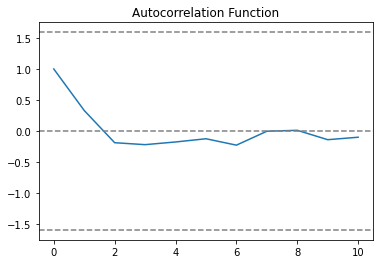

In [19]:
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

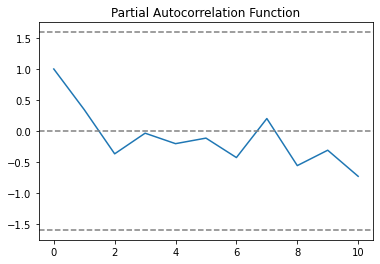

In [20]:
plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

Text(0.5, 1.0, 'RSS: nan')

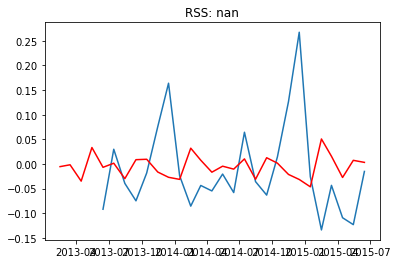

In [21]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

In [22]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2013-02-15   -0.005509
2013-03-15   -0.001776
2013-04-15   -0.034928
2013-05-15    0.033280
2013-06-15   -0.006920
dtype: float64

In [23]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2013-02-15   -0.005509
2013-03-15   -0.007285
2013-04-15   -0.042213
2013-05-15   -0.008933
2013-06-15   -0.015854
dtype: float64

In [24]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-01-15    11.763147
2013-02-15    11.757638
2013-03-15    11.755862
2013-04-15    11.720934
2013-05-15    11.754214
dtype: float64

Text(0.5, 1.0, 'RMSE: 13078.0913')

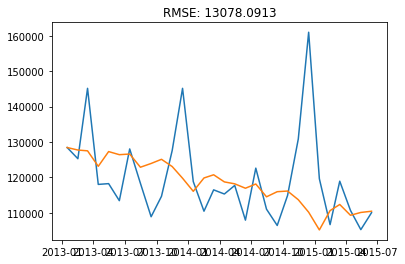

In [25]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Project Task: Week 4

Applying ANN:

1.     Use ANN (Artificial Neural Network) to predict Store Sales.
       a)    Fine-tune number of layers,
       b)    Number of Neurons in each layers .
       c)    Experiment in batch-size.
       d)    Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?
       e)    Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.
       f)    Which activation performs best for this use case and why?
       g)    Check how it performed in the dataset, calculate RMSE.
2.    Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and customer
       visits). Compare model performance with traditional ML based prediction models. 
3.    Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid
       search, cross-validation and Random search.

In [1]:
import pandas as pd
df = pd.read_csv('train_data.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [3]:
#Label encode DayOfWeek and StateHoliday

encode = LabelEncoder()

df['StateHoliday'] = df['StateHoliday'] .replace([0], '0')

df['DayOfWeek'] = encode.fit_transform(df['DayOfWeek'])


In [4]:
Temp = pd.get_dummies(df['StateHoliday'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {'0':'State0'}, inplace = True)
df.rename(columns = {'a':'Statea'}, inplace = True)
df.rename(columns = {'b':'Stateb'}, inplace = True)
df.rename(columns = {'c':'Statec'}, inplace = True)


In [5]:
Temp = pd.get_dummies(df['DayOfWeek'])
Temp.head()

df = pd.concat([df, Temp], axis=1)
df.rename(columns = {0:'sun'}, inplace = True)
df.rename(columns = {1:'mon'}, inplace = True)
df.rename(columns = {2:'tue'}, inplace = True)
df.rename(columns = {3:'wed'}, inplace = True)
df.rename(columns = {4:'thu'}, inplace = True)
df.rename(columns = {5:'fri'}, inplace = True)
df.rename(columns = {6:'sat'}, inplace = True)


In [6]:
df=df.drop(['StateHoliday','DayOfWeek'], axis=1)

In [7]:
df

Store        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0           1  2015-06-30   5735        568     1      1              0   
1           2  2015-06-30   9863        877     1      1              0   
2           3  2015-06-30  13261       1072     1      1              1   
3           4  2015-06-30  13106       1488     1      1              0   
4           5  2015-06-30   6635        645     1      1              0   
...       ...         ...    ...        ...   ...    ...            ...   
982639   1111  2013-01-01      0          0     0      0              1   
982640   1112  2013-01-01      0          0     0      0              1   
982641   1113  2013-01-01      0          0     0      0              1   
982642   1114  2013-01-01      0          0     0      0              1   
982643   1115  2013-01-01      0          0     0      0              1   

        State0  Statea  Stateb  Statec  sun  mon  tue  wed  thu  fri  sat  
0            1       0       0       0    0    1    0    0    0    0    0  
1            1       0       0       0    0    1    0    0    0    0    0  
2            1       0       0       0    0    1    0    0    0    0    0  
3            1       0       0       0    0    1    0    0    0    0    0  
4            1       0       0       0    0    1    0    0    0    0    0  
...        ...     ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  
982639       0       1       0       0    0    1    0    0    0    0    0  
982640       0       1       0       0    0    1    0    0    0    0    0  
982641       0       1       0       0    0    1    0    0    0    0    0  
982642       0       1       0       0    0    1    0    0    0    0    0  
982643       0       1       0       0    0    1    0    0    0    0    0  

[982644 rows x 18 columns]

In [8]:
X = df.drop(['Sales', 'Date'], axis=1)

Y = df['Sales']

In [11]:
#find important features before running ANN

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
regrf = RandomForestRegressor()
rfmod = regrf.fit(X,Y)

In [17]:
for name, importance in zip(X.columns, rfmod.feature_importances_):
    if importance > 0.01 :
        print('"' + name + '"'+','+ str(importance))

"Store",0.10526296621377222
"Customers",0.8586773182000547
"Promo",0.023458988593988084


In [9]:
X = df.drop(df.columns.difference(['Store','Customers','Promo']), 1, inplace=False)

In [10]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X,Y,
                                                                test_size=0.3,
                                                                random_state = 1)    

In [11]:
xtrain.shape

(687850, 3)

In [15]:
import pandas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [16]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [17]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

KeyboardInterrupt: 

In [26]:
X.iloc[:50,]

Store  Customers  Promo
0       1        568      1
1       2        877      1
2       3       1072      1
3       4       1488      1
4       5        645      1
5       6        709      1
6       7       1325      1
7       8        968      1
8       9        796      1
9      10        740      1
10     11       1357      1
11     12       1285      1
12     13        404      1
13     14        910      1
14     15        866      1
15     16       1056      1
16     17       1230      1
17     18        960      1
18     19        796      1
19     20       1053      1
20     21        646      1
21     22        665      1
22     23        555      1
23     24       1236      1
24     25       1880      1
25     26        662      1
26     27       1617      1
27     28        690      1
28     29        777      1
29     30        766      1
30     31        647      1
31     32        597      1
32     33        947      1
33     34       1183      1
34     35       1161      1
35     36       1257      1
36     37        745      1
37     38        606      1
38     39        842      1
39     40        696      1
40     41        506      1
41     42       1495      1
42     43        787      1
43     44        753      1
44     45        417      1
45     46        800      1
46     47       1294      1
47     48        432      1
48     49        592      1
49     50        439      1

In [27]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[30,40],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
import numpy as np
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X.iloc[0:5000,],Y.iloc[0:5000,], verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
134/134 [==============================] - 0s 989us/step - loss: 56894760.0000
Epoch 2/10
134/134 [==============================] - 0s 930us/step - loss: 52409916.0000
Epoch 3/10
134/134 [==============================] - 0s 1ms/step - loss: 36728288.0000
Epoch 4/10
134/134 [==============================] - 0s 997us/step - loss: 17729740.0000
Epoch 5/10
134/134 [==============================] - 0s 1ms/step - loss: 9749077.0000
Epoch 6/10
134/134 [==============================] - 0s 1ms/step - loss: 7895279.5000
Epoch 7/10
134/134 [==============================] - 0s 1ms/step - loss: 6831702.5000
Epoch 8/10
134/134 [==============================] - 0s 1ms/step - loss: 6034617.5000
Epoch 9/10
134/134 [==============================] - 0s 968us/step - loss: 5480429.0000
Epoch 10/10
134/134 [==============================] - 0s 916us/step - loss: 5100945.5000
###################################################################### Accuracy: 78.84399634199295
Epoch 1/10
134/1

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


167/167 [==============================] - 0s 882us/step - loss: 68559104.0000
Epoch 2/10
167/167 [==============================] - 0s 860us/step - loss: 54246916.0000
Epoch 3/10
167/167 [==============================] - 0s 843us/step - loss: 23489430.0000
Epoch 4/10
167/167 [==============================] - 0s 860us/step - loss: 10280728.0000
Epoch 5/10
167/167 [==============================] - 0s 883us/step - loss: 8261700.0000
Epoch 6/10
167/167 [==============================] - 0s 959us/step - loss: 7092372.5000
Epoch 7/10
167/167 [==============================] - 0s 884us/step - loss: 6290081.5000
Epoch 8/10
167/167 [==============================] - 0s 950us/step - loss: 5797983.5000
Epoch 9/10
167/167 [==============================] - 0s 921us/step - loss: 5529361.0000
Epoch 10/10
167/167 [==============================] - 0s 902us/step - loss: 5401853.0000
########## Total Time Taken:  1 Minutes
### Printing Best parameters ###


{'Optimizer_trial': 'adam', 'batch_size': 30, 'epochs': 10}

In [29]:
# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=5, input_dim=xtrain.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(xtrain, ytrain ,batch_size = 30, epochs = 10, verbose=0)
 

In [30]:
y_pred = model.predict(xtest)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [33]:
import math
from math import sqrt
r2score = r2_score(ytest, y_pred)
print('R2 Value/Coeff of Det: {}'.format(r2score))
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, y_pred)))
mse = mean_squared_error(ytest, y_pred)
print("MSE: {}".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Square Error: {}".format(rmse))

R2 Value/Coeff of Det: 0.8636235950390081
Mean Absolute Error: 944.8788815913234
MSE: 2027813.6382383907
Root Mean Square Error: 1424.0132156122677
